Test of stable single-cell system, using drag lifetime from JASON model

In [1]:
from NCell import NCell
import numpy as np
R = 6371 # radius of earth in km
alt = 600 # altitude of Starlink satellites (km)
dh = 25 # height of band (km)
V = 4*np.pi*dh*(R+alt)**2 # volume of band
S_i = 0
D_i = 0
N_i = int(2.5e-8*V)
lam = 200
T = 60
def drag_lifetime(_a, _b, _c):
    return 5
atmosphere = NCell(np.array([S_i]), np.array([D_i]), np.array([N_i]), np.array([alt]), 
                np.array([dh]), np.array([lam]), drag_lifetime)

In [2]:
atmosphere.run_sim(T, dt=0.1)
t = atmosphere.get_t()
S = atmosphere.get_S()[0]
D = atmosphere.get_D()[0]
N = atmosphere.get_N()[0]
C = atmosphere.get_C()[0]

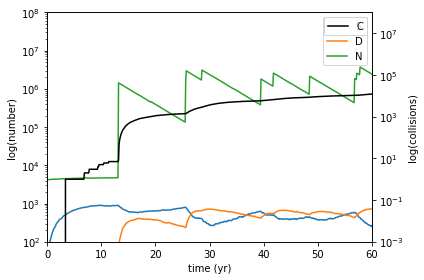

In [3]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_xlabel('time (yr)')
ax1.set_ylabel('log(number)')
ax1.set_yscale('log')
ax1.plot(t, S, label='S')
ax1.plot(t, D, label='D')
ax1.plot(t, N, label='N')
ax1.set_ylim(100, 1e8)
ax1.set_xlim(0,T)
ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('log(collisions)')  # we already handled the x-label with ax1
ax2.plot(t, C, label='C', color='k')
ax2.set_ylim(1e-3, 1e8)
ax2.set_yscale('log')
ax2.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show() 

Test of debris flowing through two layers, using drag lifetime from JASON model

In [4]:
from NCell import NCell
import numpy as np
R = 6371 # radius of earth in km
alt1, alt2 = 600, 625 # altitude of Starlink satellites (km)
dh = 25 # height of bands (km)
V1, V2 = 4*np.pi*dh*(R+alt1)**2, 4*np.pi*dh*(R+alt2)**2 # volume of bands
S_i = 0
D_i = 0
N_i1, N_i2 = int(2.5e-5*V1), int(2.5e-5*V2)
lam = 0
T = 50
def drag_lifetime(_a, _b, _c):
    return 5
atmosphere = NCell(np.array([S_i, S_i]), np.array([D_i, D_i]), np.array([N_i1, N_i2]), np.array([alt1, alt2]), 
                np.array([dh, dh]), np.array([lam, lam]), drag_lifetime)

In [5]:
atmosphere.run_sim(T, upper=False)
t = atmosphere.get_t()
N1, N2 = atmosphere.get_N()

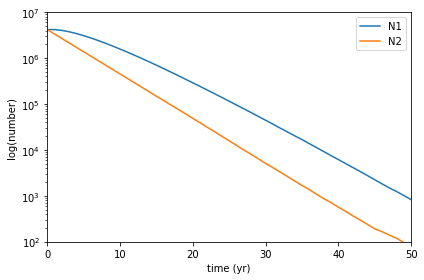

In [6]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_xlabel('time (yr)')
ax1.set_ylabel('log(number)')
ax1.set_yscale('log')
ax1.plot(t, N1, label='N1')
ax1.plot(t, N2, label='N2')
ax1.set_ylim(100, 1e7)
ax1.set_xlim(0,T)
ax1.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Test of debris flowing through multiple cells, using proper drag lifetimes

In [7]:
from NCell import NCell
from AtmosphericDecayModels import drag_lifetime 
import numpy as np
R = 6371 # radius of earth in km
dh = 50 # height of band (km)
alts = np.arange(600, 910, dh)
V = 4*np.pi*dh*(R+alts)**2 # volume of band
dhs = np.zeros(len(alts))
dhs.fill(dh)
S_i = np.zeros(len(alts), dtype=np.int64)
D_i = np.zeros(len(alts), dtype=np.int64)
N_i = np.zeros(len(alts), dtype=np.int64)
N_i[-1] = int(2.5e-8*V[-1])
lam = np.zeros(len(alts), dtype=np.int64)
T = 30
def drag_lifetime_loc(hmax, hmin, a_over_m):
    return drag_lifetime(hmax, hmin, 0, 0, a_over_m=a_over_m, dt=100/(60*60*24*365.25), maxdt=0.1)
atmosphere = NCell(S_i, D_i, N_i, alts, dhs, lam, drag_lifetime_loc)

In [8]:
atmosphere.run_sim(T, upper=False, dt=0.1)
t = atmosphere.get_t()
N = atmosphere.get_N() 

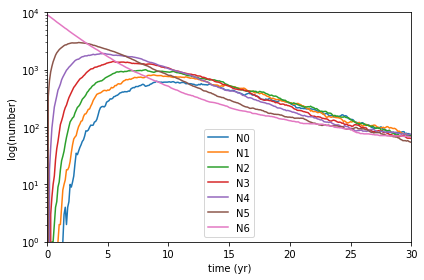

In [9]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_xlabel('time (yr)')
ax1.set_ylabel('log(number)')
ax1.set_yscale('log')
for i in range(0, len(N)):
    ax1.plot(t, N[i], label='N'+str(i))
ax1.set_ylim(1, 1e4)
ax1.set_xlim(0,T)
ax1.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Test of stable one-cell system using proper drag lifetimes

In [10]:
from NCell import NCell
from AtmosphericDecayModels import drag_lifetime 
import numpy as np
R = 6371 # radius of earth in km
alt = 600 # altitude of Starlink satellites (km)
dh = 25 # height of band (km)
V = 4*np.pi*dh*(R+alt)**2 # volume of band
S_i = 0
D_i = 0
N_i = int(2.5e-8*V)
lam = 2000
T = 40
def drag_lifetime_loc(hmax, hmin, a_over_m):
    return drag_lifetime(hmax, hmin, 0, 0, a_over_m=a_over_m, dt=100/(60*60*24*365.25), maxdt=0.1)
atmosphere = NCell(np.array([S_i]), np.array([D_i]), np.array([N_i]), np.array([alt]), 
                np.array([dh]), np.array([lam]), drag_lifetime_loc)

In [11]:
atmosphere.run_sim(T, dt=0.01)
t = atmosphere.get_t()
S = atmosphere.get_S()[0]
D = atmosphere.get_D()[0]
N = atmosphere.get_N()[0]
C = atmosphere.get_C()[0]

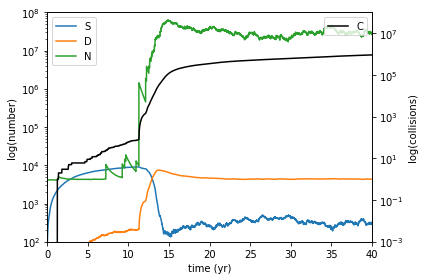

In [12]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_xlabel('time (yr)')
ax1.set_ylabel('log(number)')
ax1.set_yscale('log')
ax1.plot(t, S, label='S')
ax1.plot(t, D, label='D')
ax1.plot(t, N, label='N')
ax1.set_ylim(100, 1e8)
ax1.set_xlim(0,T)
ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('log(collisions)')  # we already handled the x-label with ax1
ax2.plot(t, C, label='C', color='k')
ax2.set_ylim(1e-3, 1e8)
ax2.set_yscale('log')
ax2.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Test of stiff one-cell system with proper drag lifetimes

In [19]:
from NCell import NCell
from AtmosphericDecayModels import drag_lifetime 
import numpy as np
R = 6371 # radius of earth in km
alt = 600 # altitude of Starlink satellites (km)
dh = 25 # height of band (km)
V = 4*np.pi*dh*(R+alt)**2 # volume of band
S_i = 0
D_i = 0
N_i = int(2.5e-8*V)
lam = 30000
T = 40
def drag_lifetime_loc(hmax, hmin, a_over_m):
    return drag_lifetime(hmax, hmin, 0, 0, a_over_m=a_over_m, dt=100/(60*60*24*365.25), maxdt=0.1)
atmosphere = NCell(np.array([S_i]), np.array([D_i]), np.array([N_i]), np.array([alt]), 
                np.array([dh]), np.array([lam]), drag_lifetime_loc)

In [20]:
atmosphere.run_sim(T, dt=0.01)
t = atmosphere.get_t()
S = atmosphere.get_S()[0]
D = atmosphere.get_D()[0]
N = atmosphere.get_N()[0]
C = atmosphere.get_C()[0]

KeyboardInterrupt: 

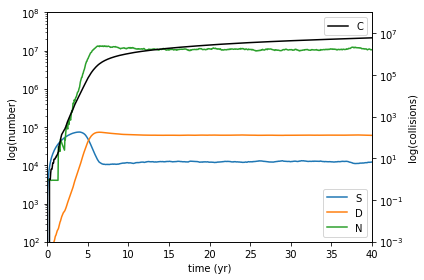

In [6]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_xlabel('time (yr)')
ax1.set_ylabel('log(number)')
ax1.set_yscale('log')
ax1.plot(t, S, label='S')
ax1.plot(t, D, label='D')
ax1.plot(t, N, label='N')
ax1.set_ylim(100, 1e8)
ax1.set_xlim(0,T)
ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('log(collisions)')  # we already handled the x-label with ax1
ax2.plot(t, C, label='C', color='k')
ax2.set_ylim(1e-3, 1e8)
ax2.set_yscale('log')
ax2.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Test stiff N-cell system with multiple shells getting launched satellites

In [1]:
from NCell import NCell
from AtmosphericDecayModels import drag_lifetime 
import numpy as np
R = 6371 # radius of earth in km
dh = 50 # height of band (km)
alts = np.arange(600, 910, dh)
V = 4*np.pi*dh*(R+alts)**2 # volume of band
dhs = np.zeros(len(alts))
dhs.fill(dh)
S_i = np.zeros(len(alts), np.int64)
D_i = np.zeros(len(alts), np.int64)
N_i = np.zeros(len(alts), np.int64)
for i in range(len(alts)):
    N_i[i] = int(2.5e-8*V[i])
lam = np.zeros(len(alts))
lam[0] = 0
lam[3] = 0
lam[-1] = 0
T = 150
def drag_lifetime_loc(hmax, hmin, a_over_m):
    return drag_lifetime(hmax, hmin, 0, 0, a_over_m=a_over_m, dt=100/(60*60*24*365.25), maxdt=0.1)
atmosphere = NCell(S_i, D_i, N_i, alts, dhs, lam, drag_lifetime_loc)

In [2]:
atmosphere.run_sim(T, dt=0.001)
t = atmosphere.get_t()
S0, S1, S2 = atmosphere.get_S()[0], atmosphere.get_S()[3], atmosphere.get_S()[-1]
D0, D1, D2 = atmosphere.get_D()[0], atmosphere.get_D()[3], atmosphere.get_D()[-1]
N0, N1, N2 = atmosphere.get_N()[0], atmosphere.get_N()[3], atmosphere.get_N()[-1] 

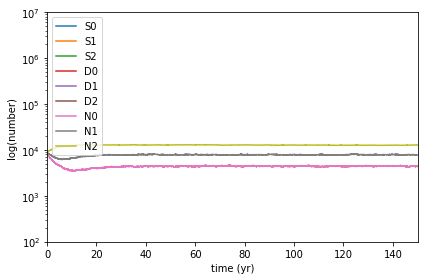

In [3]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_xlabel('time (yr)')
ax1.set_ylabel('log(number)')
ax1.set_yscale('log')
ax1.plot(t, S0, label='S0')
ax1.plot(t, S1, label='S1')
ax1.plot(t, S2, label='S2')
ax1.plot(t, D0, label='D0')
ax1.plot(t, D1, label='D1')
ax1.plot(t, D2, label='D2')
ax1.plot(t, N0, label='N0')
ax1.plot(t, N1, label='N1')
ax1.plot(t, N2, label='N2')
ax1.set_ylim(100, 1e7)
ax1.set_xlim(0,T)
ax1.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()